## Packages

In [1]:
import zipfile
import os
import random

import pandas as pd
import matplotlib.pyplot as plt

import imageio
import cv2

## Upload Data to Google Drive

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# open zip file
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/rawData.zip', 'r')

# create folder with raw data
zip_ref.extractall('/content/BloodCellData')
zip_ref.close()

In [5]:
# Check uploaded train data
print("Number of Images: ", len(os.listdir('../content/BloodCellData/Data/Train/EOSINOPHIL')))
print("Number of Images: ", len(os.listdir('../content/BloodCellData/Data/Train/LYMPHOCYTE')))
print("Number of Images: ", len(os.listdir('../content/BloodCellData/Data/Train/MONOCYTE')))
print("Number of Images: ", len(os.listdir('../content/BloodCellData/Data/Train/NEUTROPHIL')))

Number of Images:  2497
Number of Images:  2483
Number of Images:  2478
Number of Images:  2499


In [6]:
# Check uploaded test data
print("Number of Images: ", len(os.listdir('../content/BloodCellData/Data/Test/EOSINOPHIL')))
print("Number of Images: ", len(os.listdir('../content/BloodCellData/Data/Test/LYMPHOCYTE')))
print("Number of Images: ", len(os.listdir('../content/BloodCellData/Data/Test/MONOCYTE')))
print("Number of Images: ", len(os.listdir('../content/BloodCellData/Data/Test/NEUTROPHIL')))

Number of Images:  623
Number of Images:  620
Number of Images:  620
Number of Images:  624


In [7]:
# Data Directory
datadir = '../content/BloodCellData/Data/'

# Cell Type Catagories
cellTypes = ["EOSINOPHIL", "LYMPHOCYTE", "MONOCYTE", "NEUTROPHIL"]

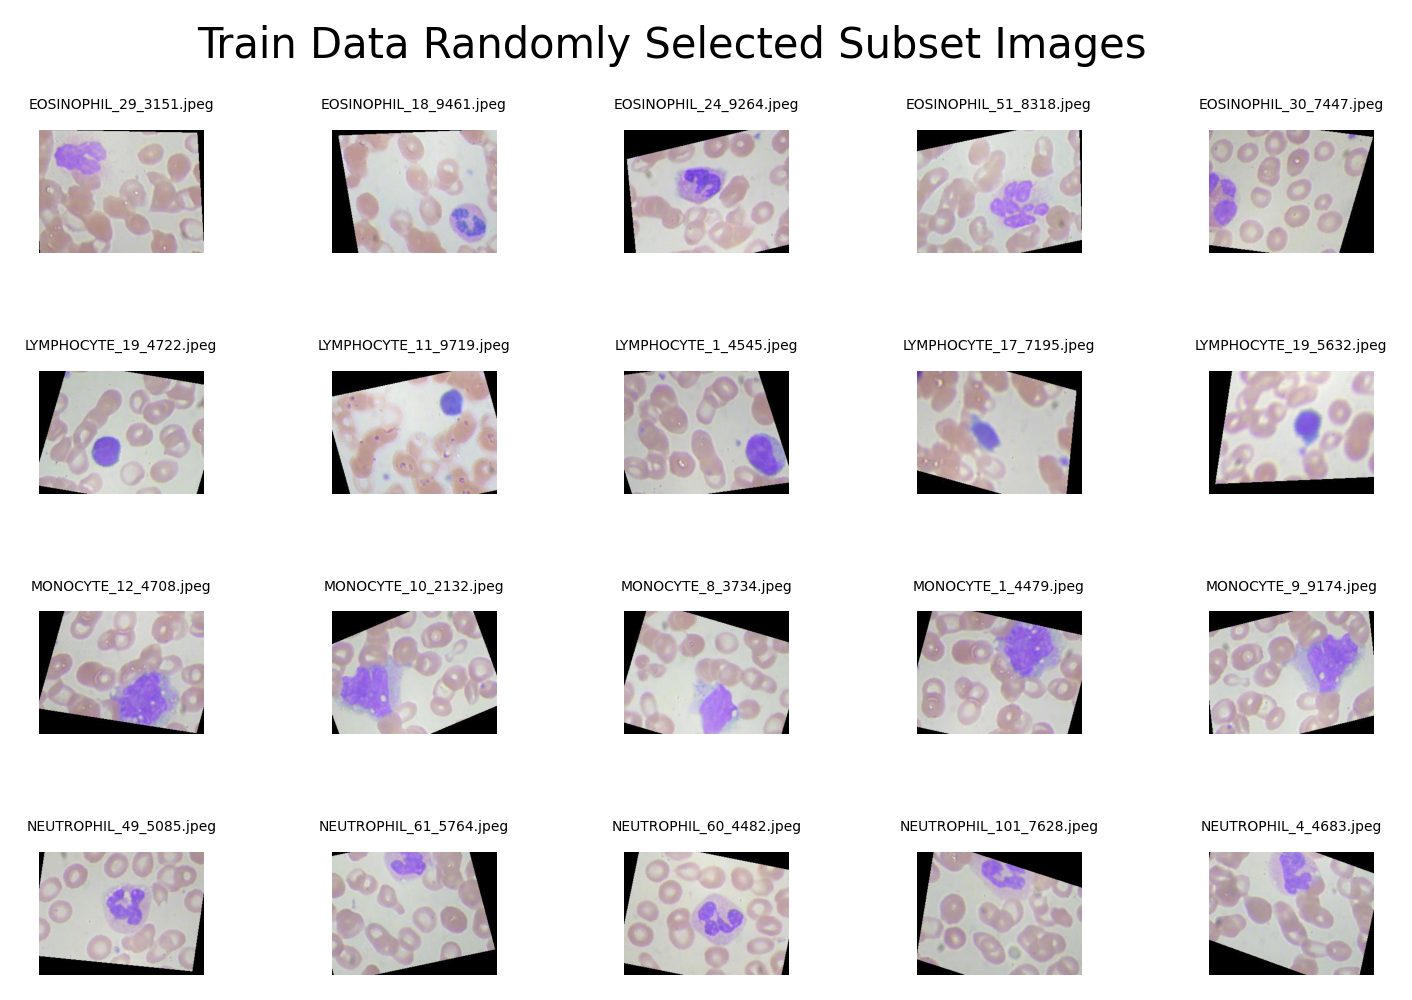

In [9]:
# Train Data Dir
dir = os.path.join(datadir,'Train')

fig, ax = plt.subplots(nrows=4, ncols=5)
plt.rcParams['figure.dpi'] = 250
plt.tight_layout()


# subplot row
i = 0

# Randomly select 5 images from each cellType and plot it in subplot
for cellType in cellTypes:
  for j in range(5):
    path = os.path.join(dir,cellType)
    img = random.choice(os.listdir(path))
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    ax[i,j].imshow(img_array, cmap='gray')
    ax[i,j].set_title(cellType+img, fontsize=4)
    ax[i,j].axis('off')

  # Increment subplot row
  i = i+1

fig.suptitle("Train Data Randomly Selected Subset Images", y=1.05)
plt.show()

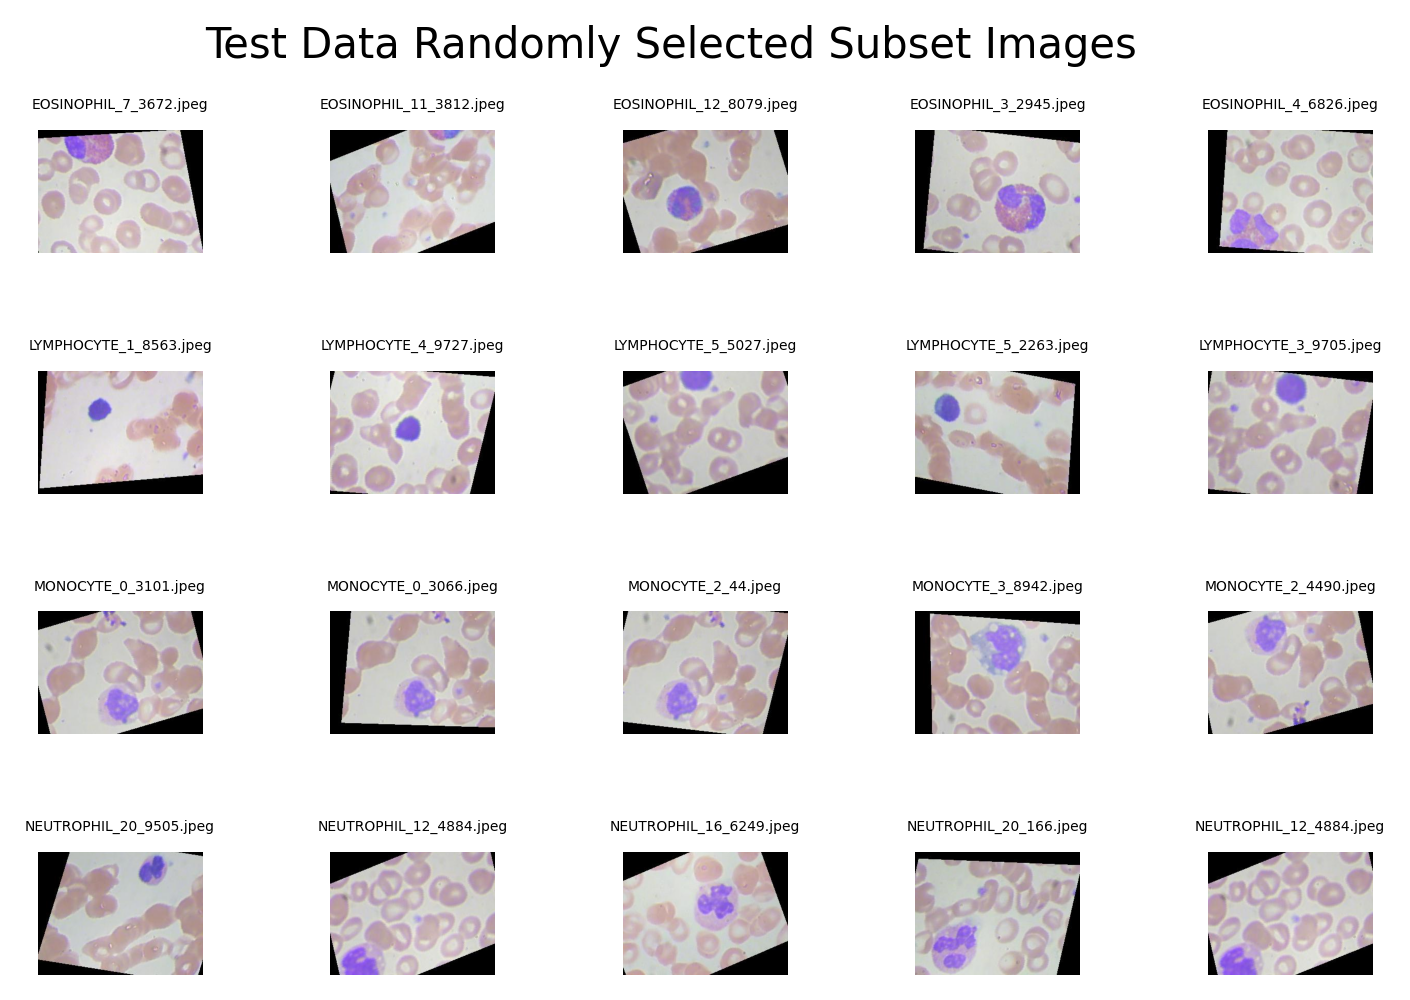

In [10]:
# Test Data Dir
dir = os.path.join(datadir,'Test')

fig, ax = plt.subplots(nrows=4, ncols=5)
plt.rcParams['figure.dpi'] = 250
plt.tight_layout()


# subplot row
i = 0

# Randomly select 5 images from each cellType and plot it in subplot
for cellType in cellTypes:
  for j in range(5):
    path = os.path.join(dir,cellType)
    img = random.choice(os.listdir(path))
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    ax[i,j].imshow(img_array, cmap='gray')
    ax[i,j].set_title(cellType+img, fontsize=4)
    ax[i,j].axis('off')

  # Increment subplot row
  i = i+1

fig.suptitle("Test Data Randomly Selected Subset Images", y=1.05)
plt.show()

## Project Proposal Outline

### Problem Statement

How can collected and labeled medical images on white blood cells be used to train an image classifier to appropriately classify unidentified white blood cells? What information does the classifier place with high importance when classifying an image?

### Context

Health related illness and diseases can be diagnosed through blood cell counting. Ways to automate identification and counting will speed up diagnostics, as well as infer high level medical information.
Specifically, white blood cell counts can identify types of immune system diseases, health habits or infections within the body. Image classification can be expanded to classifiy larger images that may contain multiple types of cells, as well as other types of cells.

In this project, 4 types of white blood cells are identified through staining of their granulocytes.

1.   Eosinophils
*   Bi-lobed, sausage-shaped stain.
*   Primarily fights against parasites.

2.   Lymphocytes
*   Single large and round shaped stain.
*   Primarily fights against viral infections.

3. Monocyte
*   Single large and kidney shaped stain.
*   Primarily used to clean up damaged and dead cells.

4. Neutrophil
*   Multi-lobed stains.
*   Primarily fights against bacterial infections.









### Criteria for Success

Trained image classifier is able to classify images in the test folder with at least 95% or higher accuracy.

### Scope of Solution Space

Scope is classifying images from the test folder on 4 types of white blood cells: EOSINOPHIL, LYMPHOCYTE, MONOCYTE, and NEUTROPHIL.

### Constraints

Medical images are not perfect and can have defects or poor quality. Cells can also be deformed in certain ways due to biological reasons and may not be in its ideal form. Combined, images may be distored and difficult to classify, as well as potentially be missclassified.

### Stakeholders

1. Government agency
2. Medial professionals
3. Hosptial directors
4. Medical diagnostics services




### Data Sources

Test and Train data sets are provided by Paul Mooney from Kaggle, https://www.kaggle.com/paultimothymooney/blood-cells.

His data is derived and augmented from acknowledgements to https://github.com/Shenggan/BCCD_Dataset, MIT License.